Wave
wave form / spectrogram - spectrum을 시간으로 쭉 늘려놓은 것 / spectrum - 한 순간에 어떤 성분들이 있는가.

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [44]:
amp = 1         
sr = 10000       
dur = 0.5        
freq = 440.0  #440 - A라 / 배수로 하면 다 똑같은 음에 옥타브인 형태로 나타남.

In [45]:
# generate time
t = np.arange(1, sr * dur+1)/sr

In [46]:
# generate phase
theta = t * 2*np.pi * freq

In [47]:
# generate signal by cosine-phasor
s = amp*np.sin(theta)

In [48]:
s

array([ 2.72951936e-01,  5.25174630e-01,  7.37513117e-01, ...,
       -5.25174630e-01, -2.72951936e-01,  3.13806691e-14])

In [53]:
# generate signal by cosine-phasor
s = amp*np.cos(theta)

Text(0, 0.5, 'real')

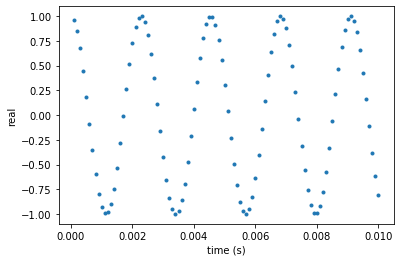

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:100], s[0:100], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [50]:
ipd.Audio(s, rate=sr)

In [57]:
# generate signal by complex-phasor
c = np.exp(theta*1j)
c

array([0.96202767+2.72951936e-01j, 0.85099448+5.25174630e-01j,
       0.67533281+7.37513117e-01j, ..., 0.85099448-5.25174630e-01j,
       0.96202767-2.72951936e-01j, 1.        +3.13806691e-14j])

cos에서 얼마만큼 이동하면 sin이 될까?
각도 radian으로 나타낸다면
ㅠ/2 - 90도만큼 차이가 있음
각도 - phase
우리의 귀가 phase는 인식하지 못한다... 각도를 옮긴다고 해도 차이를 인지하지 못함.
But frequency는 인지함.

Text(0.5, 0, 'imag')

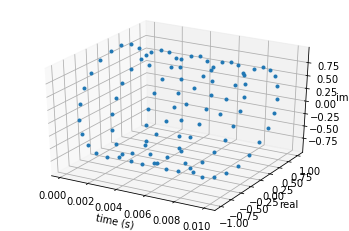

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:100], c.real[0:100], c.imag[0:100], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')
#complex 자체는 ploting하지 못하기 때문에 a와 b를 각각 떼서 2차원에서 찍음...

In [63]:
ipd.Audio(c.real, rate=sr) #cos값을 듣는 것

In [64]:
ipd.Audio(c.imag, rate=sr) #sin과 cos의 소리는 같음!

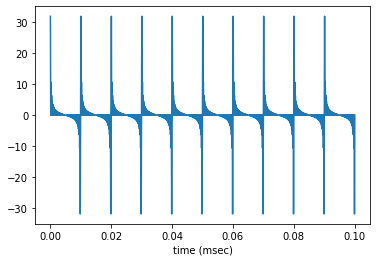

In [65]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

> Wave form / spectrum이 아님!!

In [68]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b
#resonance만 사용!

> function을 만드는 방법!
> def function name(입력값)

In [69]:
RG = 0  # RG is the frequency of the Glottal Resonator / frequency0에 뚱뚱하고 완만한 산을 만들면 gradually decreasing하는 shape이 나옴
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)
#resonance / sampling rate, 산맥의 위치 - frequency, 산맥이 얼마나 뚱뚱하거나 뾰족한지... 산맥의 폭
#spectrum... harmonics가 gradually decreasing하도록 해야함...

In [70]:
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)
#F1을 만들기 / 앞에것은 gradually decreasing하는 형태를 씌운 것임

In [71]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [72]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [73]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [74]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)